<a href="https://colab.research.google.com/github/SeonHyungJo/tensorflow-2.0-study/blob/master/Ch06_%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

오랫동안 이미지 데이터틑 숫자나 표보다 다루기 어렵다고 여겨졌다.
CNN이 대중화가 되기 전까지

특징 추출의 기법 중 하나인 컴볼루션 연산

제일 중요한 컨볼루션 레이어, 풀링 레이어, 드롭아웃 레이어를 사용해서 테스트해보자

In [ ]:
# Fashion MNIST 사용해서 다시 특정하기
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


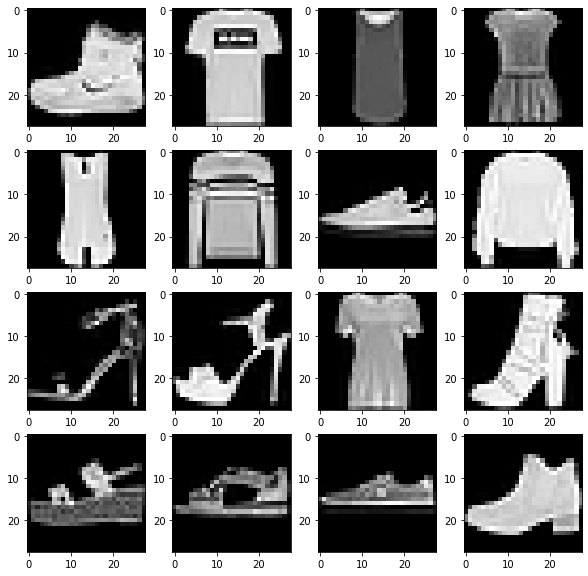

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for c in range(16):
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c].reshape(28, 28), cmap='gray')
plt.show()

print(train_Y[:16])

In [ ]:
# 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
              

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

In [ ]:
!nvidia-smi

Wed Aug 26 15:07:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    59W / 149W |    199MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

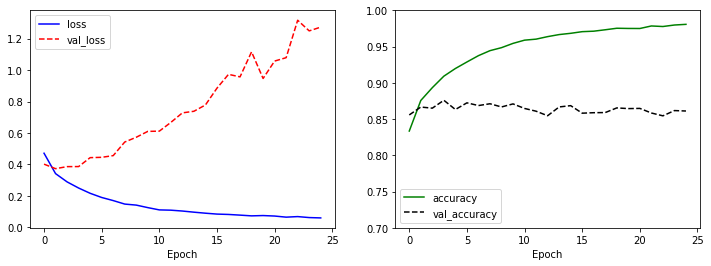

[1.3621169328689575, 0.8529999852180481]

In [ ]:
# 컨볼루션 신경망 모델 학습
# history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)


In [ ]:
# 폴링 레이어 드롭아웃 레이어 추가
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
  tf.keras.layers.MaxPool2D(strides=(2,2)),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
  tf.keras.layers.MaxPool2D(strides=(2,2)),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

Epoch 1/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5272 - accuracy: 0.8080 - val_loss: 0.3775 - val_accuracy: 0.8592
Epoch 2/25
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3594 - accuracy: 0.8692 - val_loss: 0.3453 - val_accuracy: 0.8749
Epoch 3/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3166 - accuracy: 0.8840 - val_loss: 0.3194 - val_accuracy: 0.8853
Epoch 4/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2906 - accuracy: 0.8936 - val_loss: 0.3110 - val_accuracy: 0.8899
Epoch 5/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2682 - accuracy: 0.9016 - val_loss: 0.2963 - val_accuracy: 0.8943
Epoch 6/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2529 - accuracy: 0.9067 - val_loss: 0.2927 - val_accuracy: 0.8963
Epoch 7/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2360 - accuracy: 0.9104 - val_loss: 0.3136 - val_acc

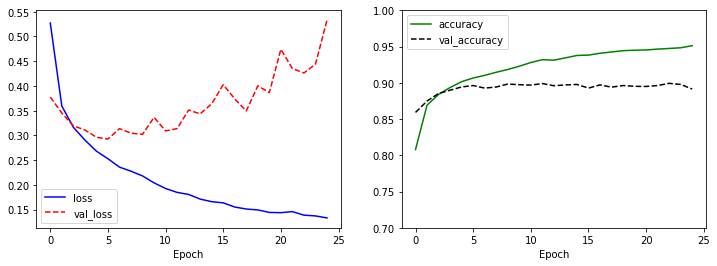

[0.5361418724060059, 0.885699987411499]

In [ ]:
# 컨볼루션 신경망 모델 학습 - 폴링 레이어 드롭아웃 레이어 추가
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)


In [ ]:
# VGGNet 스타일의 모델 정의
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
  tf.keras.layers.MaxPool2D(strides=(2,2)),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
  tf.keras.layers.MaxPool2D(strides=(2,2)),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 256)        

Epoch 1/25
1407/1407 [==============================] - 24s 17ms/step - loss: 0.5839 - accuracy: 0.7880 - val_loss: 0.3408 - val_accuracy: 0.8702
Epoch 2/25
1407/1407 [==============================] - 24s 17ms/step - loss: 0.3676 - accuracy: 0.8697 - val_loss: 0.2749 - val_accuracy: 0.9007
Epoch 3/25
1407/1407 [==============================] - 24s 17ms/step - loss: 0.3219 - accuracy: 0.8854 - val_loss: 0.2539 - val_accuracy: 0.9095
Epoch 4/25
1407/1407 [==============================] - 24s 17ms/step - loss: 0.3030 - accuracy: 0.8906 - val_loss: 0.2610 - val_accuracy: 0.9055
Epoch 5/25
1407/1407 [==============================] - 24s 17ms/step - loss: 0.2904 - accuracy: 0.8965 - val_loss: 0.2370 - val_accuracy: 0.9133
Epoch 6/25
1407/1407 [==============================] - 23s 16ms/step - loss: 0.2782 - accuracy: 0.9003 - val_loss: 0.2542 - val_accuracy: 0.9079
Epoch 7/25
1407/1407 [==============================] - 23s 16ms/step - loss: 0.2712 - accuracy: 0.9042 - val_loss: 0.2275 -

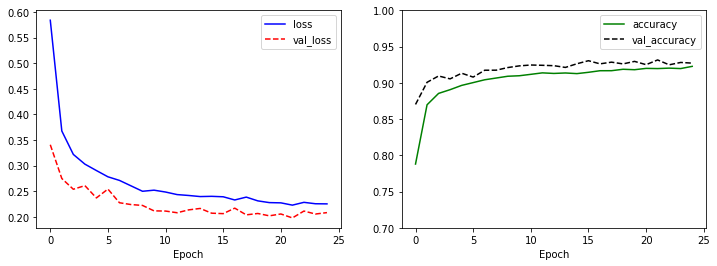

[0.22016890347003937, 0.9215999841690063]

In [ ]:
# 컨볼루션 신경망 모델 학습 - VGGNet 스타일 추가
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)
